In [1]:
from sympy import *
from sympy.solvers import solve
import sympy as sp
import matplotlib.pyplot as plt

In [2]:
alpha_1, alpha_2, q_x, q_y, a = symbols("\\alpha_1 \\alpha_2 q_x q_y a")
alpha_1

\alpha_1

In [3]:
# Defining the matrix
D = Matrix([
    [
        4*alpha_1*sin(q_x*a/2)**2 + 2*alpha_2*(1 - cos(q_x*a)*cos(q_y*a)),
        2*alpha_2*sin(q_x*a)*sin(q_y*a)
    ],
    [
        2*alpha_2*sin(q_x*a)*sin(q_y*a),
        4*alpha_1*sin(q_y*a/2)**2 + 2*alpha_2*(1 - cos(q_x*a)*cos(q_y*a))
    ]
])
D

Matrix([
[4*\alpha_1*sin(a*q_x/2)**2 + 2*\alpha_2*(-cos(a*q_x)*cos(a*q_y) + 1),                                     2*\alpha_2*sin(a*q_x)*sin(a*q_y)],
[                                    2*\alpha_2*sin(a*q_x)*sin(a*q_y), 4*\alpha_1*sin(a*q_y/2)**2 + 2*\alpha_2*(-cos(a*q_x)*cos(a*q_y) + 1)]])

In [4]:
vec1, vec2 = D.eigenvals(simplify=True)
vec1

2*\alpha_1*sin(a*q_x/2)**2 + 2*\alpha_1*sin(a*q_y/2)**2 - 2*\alpha_2*cos(a*q_x)*cos(a*q_y) + 2*\alpha_2 - 2*sqrt(\alpha_1**2*sin(a*q_x/2)**4 - 2*\alpha_1**2*sin(a*q_x/2)**2*sin(a*q_y/2)**2 + \alpha_1**2*sin(a*q_y/2)**4 + \alpha_2**2*sin(a*q_x)**2*sin(a*q_y)**2)

In [5]:
omega1 = sqrt(vec1/Symbol("M"))
omega2 = sqrt(vec2/Symbol("M"))
omega1

sqrt((2*\alpha_1*sin(a*q_x/2)**2 + 2*\alpha_1*sin(a*q_y/2)**2 - 2*\alpha_2*cos(a*q_x)*cos(a*q_y) + 2*\alpha_2 - 2*sqrt(\alpha_1**2*sin(a*q_x/2)**4 - 2*\alpha_1**2*sin(a*q_x/2)**2*sin(a*q_y/2)**2 + \alpha_1**2*sin(a*q_y/2)**4 + \alpha_2**2*sin(a*q_x)**2*sin(a*q_y)**2))/M)

In [6]:
# Substituting numbers
alpha_1 = 200  # N/m
alpha_2 = 100  # N/m
a = 1  # M
M = 2*10**-28  # kg
from math import pi
omega1 = simplify(omega1.subs({
    Symbol("M"): M,
    Symbol("\\alpha_1"): alpha_1,
    Symbol("\\alpha_2"): alpha_2,
    Symbol("a"): a
}))
omega2 = simplify(omega2.subs({
    Symbol("M"): M,
    Symbol("\\alpha_1"): alpha_1,
    Symbol("\\alpha_2"): alpha_2,
    Symbol("a"): a
}))
omega1

1.0e+15*sqrt(-sqrt(4*sin(q_x/2)**4 - 8*sin(q_x/2)**2*sin(q_y/2)**2 + sin(q_x)**2*sin(q_y)**2 + 4*sin(q_y/2)**4) + 2*sin(q_x/2)**2 + 2*sin(q_y/2)**2 - cos(q_x)*cos(q_y) + 1)

In [7]:
def ome1(x, y):
    return omega1.subs({
        Symbol("q_x"): x,
        Symbol("q_y"): y
    })
def ome2(x, y):
    return omega2.subs({
        Symbol("q_x"): x,
        Symbol("q_y"): y
    })

In [8]:
from numpy import linspace
xs = linspace(0, 2*pi/a, 200)
ws1 = []
ws2 = []
y = 0
for x in linspace(0, pi/a, 100):
    ws1.append(ome1(x, 0))
    ws2.append(ome2(x, 0))

len(ws1)

100

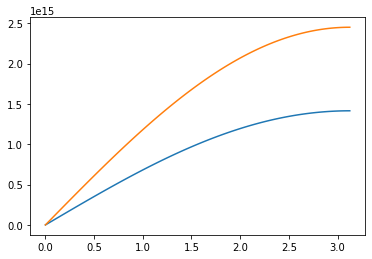

In [9]:
plt.clf()
plt.plot(xs[0: len(ws1)], ws1)
plt.plot(xs[0: len(ws2)], ws2)
plt.show()

In [10]:
x = pi/a
for y in linspace(0, pi/a, 100):
    ws1.append(ome1(x, y))
    ws2.append(ome2(x, y))

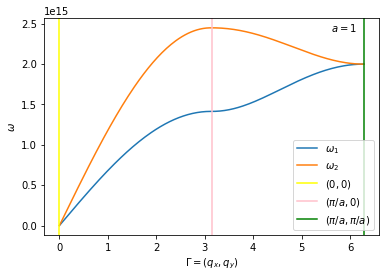

In [19]:
plt.clf()
plt.plot(xs[0: len(ws1)], ws1, label="$\\omega_1$")
plt.plot(xs[0: len(ws2)], ws2, label="$\\omega_2$")
plt.axvline(x=0, label="$(0, 0)$", color="yellow")
plt.axvline(x=pi/a, label="$(\\pi/a, 0)$", color="pink")
plt.axvline(x=2*pi/a, label="$(\\pi/a, \\pi/a)$", color="green")
plt.legend()
plt.text(5.6, 2.4*10**15, "$a=1$")
plt.xlabel("$\\Gamma = (q_x, q_y)$")
plt.ylabel("$\\omega$")
plt.savefig("Condensed_HW.png")